## First of All...

If you are using this notebook from Google Colab, you need to fetch the necessary resources by running:

In [ ]:
!wget https://raw.githubusercontent.com/lompabo/bbs2019dtm/master/lab03/resources.tgz
!tar -xzf resources.tgz
!pip install pillow
!pip install prince
!pip install fastdtw
!pip install pyproj

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Read data
data = pd.read_csv('resources/iris.csv')
data.head()
# Obtain columns
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
# Standardize
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Obtain true classes as integers
lenc = LabelEncoder()
Y = lenc.fit_transform(data['species'])

<BarContainer object of 3 artists>

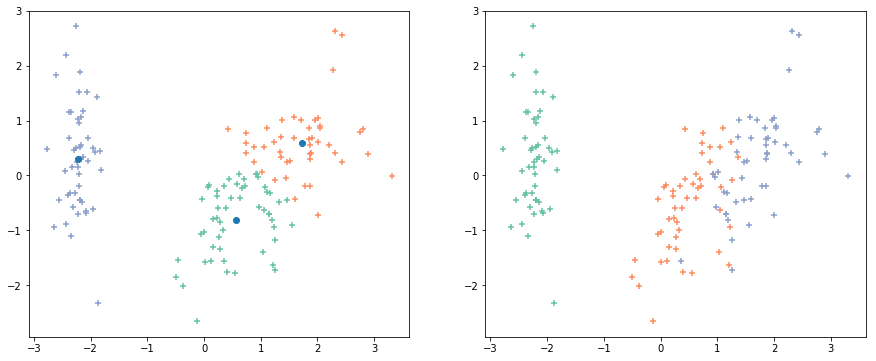

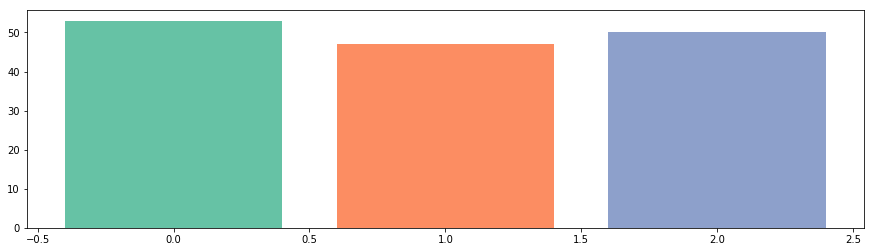

In [2]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Build a clustering object
cls = KMeans(3)
# Train
cls.fit(X)
# Find cluster for each data point
y = cls.labels_

# Dimensionality reduction to allow visualization
pca = PCA(2)
Xred = pca.fit_transform(X)
Cred = pca.transform(cls.cluster_centers_)

# Display results (scatter)
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.scatter(Xred[:, 0], Xred[:, 1], marker='+', c=cm.Set2(y))
plt.scatter(Cred[:, 0], Cred[:, 1])
plt.subplot(122)
plt.scatter(Xred[:, 0], Xred[:, 1], marker='+', c=cm.Set2(Y))
# Show cluster sizes
plt.figure(figsize=(15, 4))
plt.bar(np.unique(y), np.bincount(y), color=cm.Set2(np.unique(y)))

<BarContainer object of 3 artists>

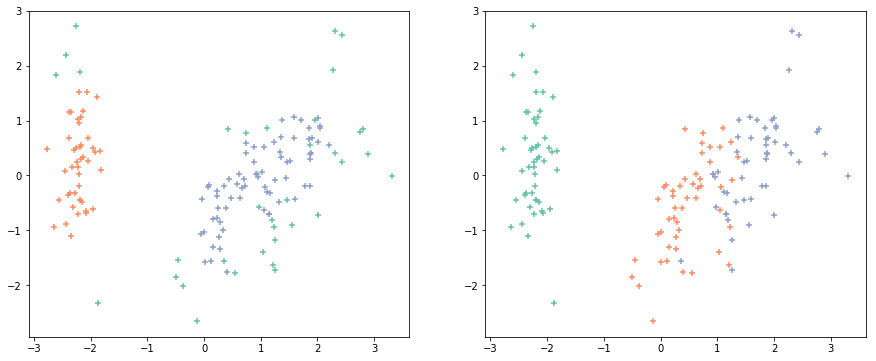

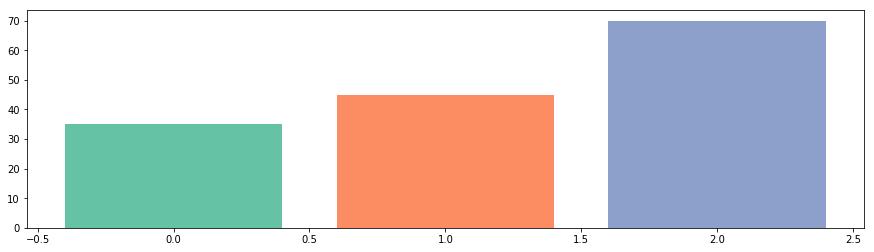

In [6]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Build a clustering object
cls = DBSCAN(eps=0.6, min_samples=10)
# Train
cls.fit(X)
# Find cluster for each data point
y = cls.labels_+1

# Dimensionality reduction to allow visualization
pca = PCA(2)
Xred = pca.fit_transform(X)

# Display results (scatter)
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.scatter(Xred[:, 0], Xred[:, 1], marker='+', c=cm.Set2(y))
plt.subplot(122)
plt.scatter(Xred[:, 0], Xred[:, 1], marker='+', c=cm.Set2(Y))
# Show cluster sizes
plt.figure(figsize=(15, 4))
plt.bar(np.unique(y), np.bincount(y), color=cm.Set2(np.unique(y)))